<h2 style="font-weight: 700; text-align: center">Histogram Equalization</h2>

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Importing subject image as a grayscale image

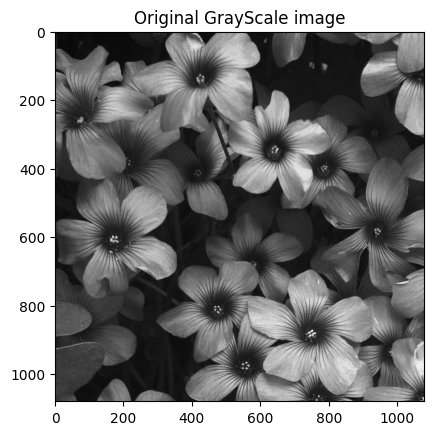

In [15]:
img = cv.imread("./Periwinkle.jpg")
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgg = imgg[:1080, :1080]
plt.title("Original GrayScale image")
plt.imshow(imgg, cmap="gray")
plt.show()

imgg2 = np.array([[1, 1, 3, 6, 4, 3, 1], [5, 6, 3, 4, 5, 5, 3], [3, 4, 3, 2, 4, 3, 5], [5, 5, 4, 1, 3, 2, 3], [1, 3, 4, 5, 6, 5, 4], [4, 6, 4, 1, 2, 2, 3], [2, 4, 6, 3, 2, 4, 5]])
max_px_val = 256  # should be in the order of 2 ** n

#### Utility Function - Matplotting the output(s)

In [16]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(12, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### Histogram plotting function

In [17]:
def return_frequency(img, max = 256):
  # this time, initiate frequency for all pixels as 0 first, last time this only had existing gray levels with their corr. freq. 
  # but this time the non-existing ones are also there with freq. 0
  frequency = {i: 0 for i in range(max)}
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      frequency[img[x][y]] += 1
      
  return frequency

#### Histogram Plot for the input Image - 1

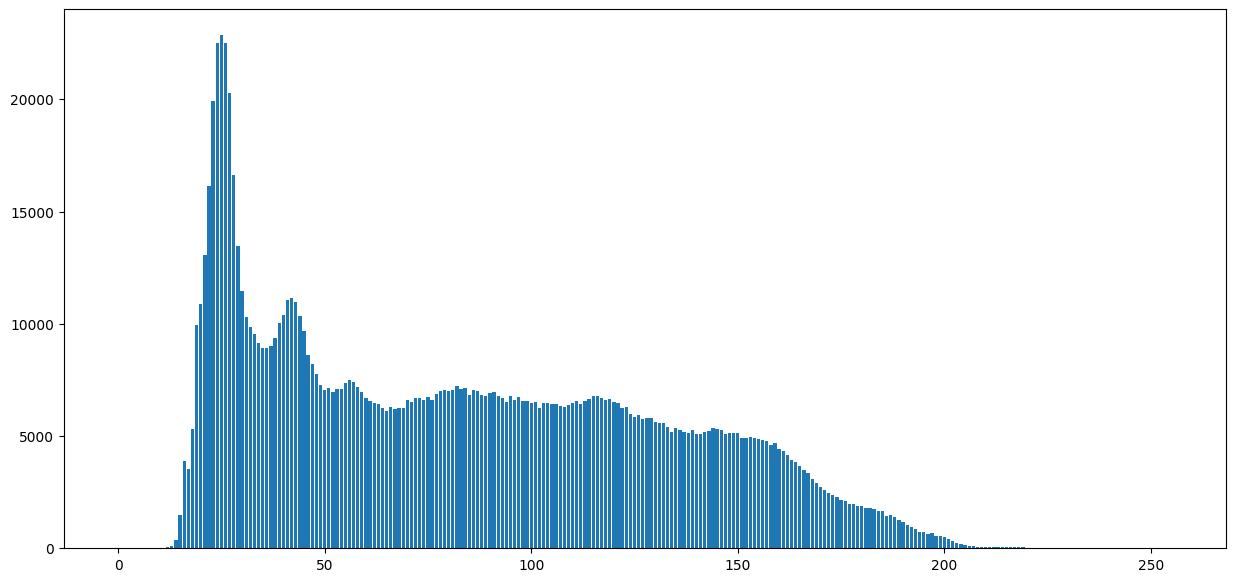

In [18]:
freq = return_frequency(imgg, max_px_val)
plt.figure(figsize=(15, 7))
plt.bar(list(freq.keys()), list(freq.values()))
plt.show()

#### Main - Histogram Equalization function

In [19]:
def histogram_equalization(img, max = 256):  
  # getting nk
  freqs = return_frequency(img, max)

  # the main calculations table, a dictionary with keys as the column labels and values as lists, i.e the columns with initial values
  calcs = { "n": [i for i in range(max)], 
            "nk": [v for k, v in freqs.items()], 
            "pdf": [0 for _ in range(max)], 
            "cdf": [0 for _ in range(max)],
            "(L-1) * cdf": [max - 1 for _ in range(max)], 
            "rounding": [0 for _ in range(max)] }
  
  for i in range(len(calcs["nk"])):
    # pdf
    calcs["pdf"][i] = calcs["nk"][i] / sum(calcs["nk"])
    
    # cdf
    if i > 0:
      calcs["cdf"][i] = calcs["cdf"][i - 1] + calcs["pdf"][i]
    else:
      calcs["cdf"][i] = calcs["pdf"][i]
    
    # (L - 1) * CDF
    calcs["(L-1) * cdf"][i] = calcs["(L-1) * cdf"][i] * calcs["cdf"][i]
    # Rounding
    calcs["rounding"][i] = round(calcs["(L-1) * cdf"][i])
  
  # Forming the new image
  equalized_img = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      equalized_img[i][j] = calcs["rounding"][img[i][j]]

  return np.array(equalized_img)

#### Callers

##### Histogram equalization on Image 1

In [20]:
equalized = histogram_equalization(imgg, max_px_val)

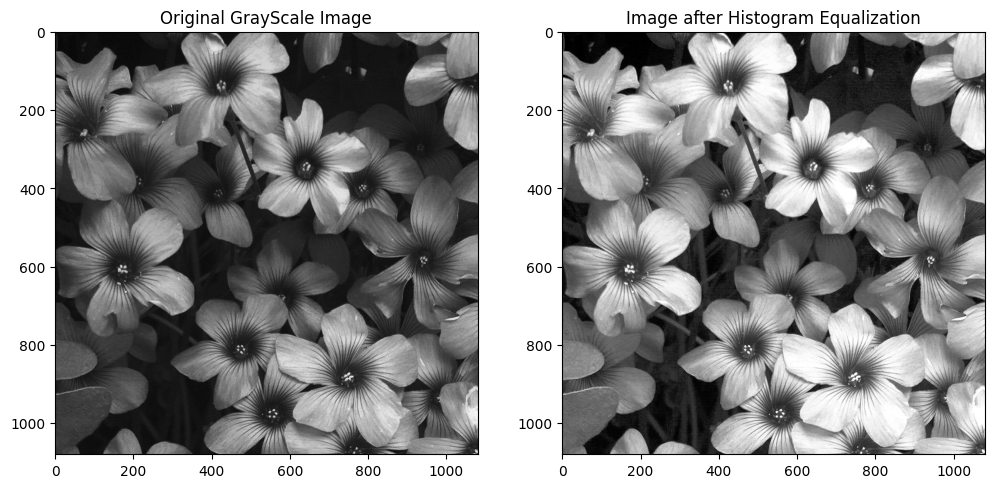

In [21]:
matplot_images(imgg, equalized, titles=["Original GrayScale Image", "Image after Histogram Equalization"])

#### Histogram Plot for the output Image - 1

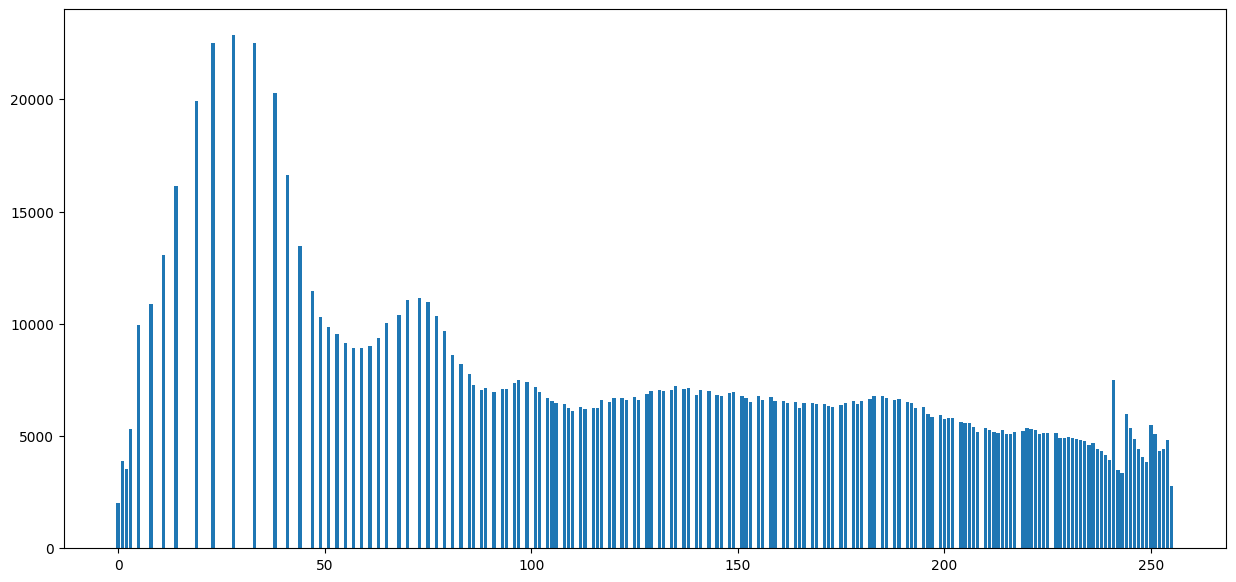

In [22]:
freq = return_frequency(equalized, max_px_val)
plt.figure(figsize=(15, 7))
plt.bar(list(freq.keys()), list(freq.values()))
plt.show()

##### Histogram equalization on Image 2

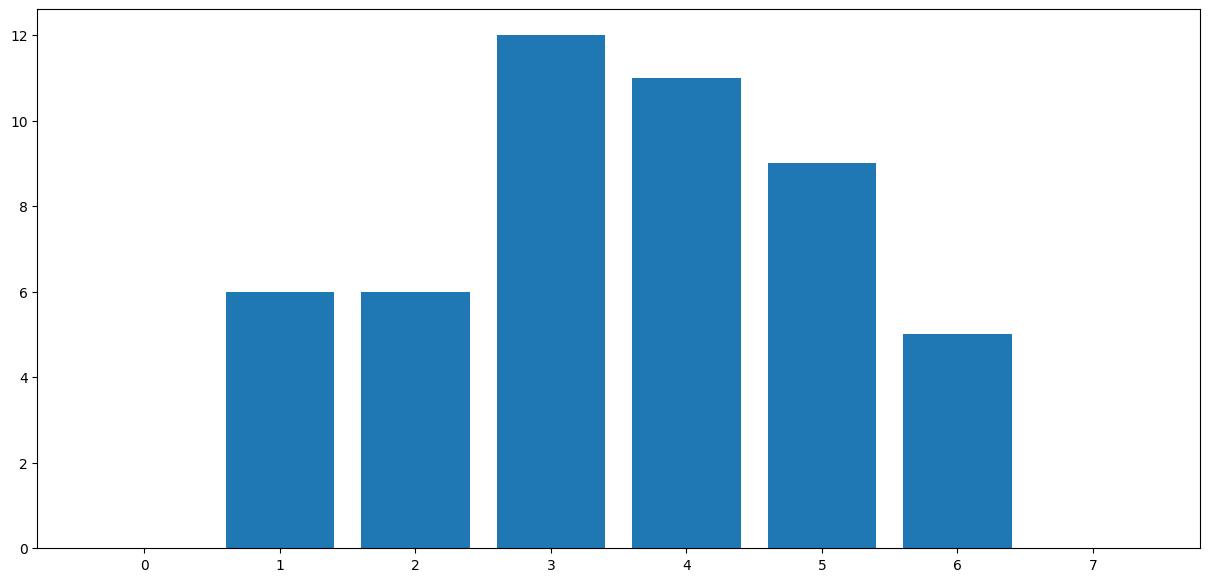

In [23]:
freq = return_frequency(imgg2, 8)
plt.figure(figsize=(15, 7))
plt.bar(list(freq.keys()), list(freq.values()))
plt.show()

In [24]:
equalized = histogram_equalization(imgg2, 8)
print(equalized)

[[1 1 3 7 5 3 1]
 [6 7 3 5 6 6 3]
 [3 5 3 2 5 3 6]
 [6 6 5 1 3 2 3]
 [1 3 5 6 7 6 5]
 [5 7 5 1 2 2 3]
 [2 5 7 3 2 5 6]]


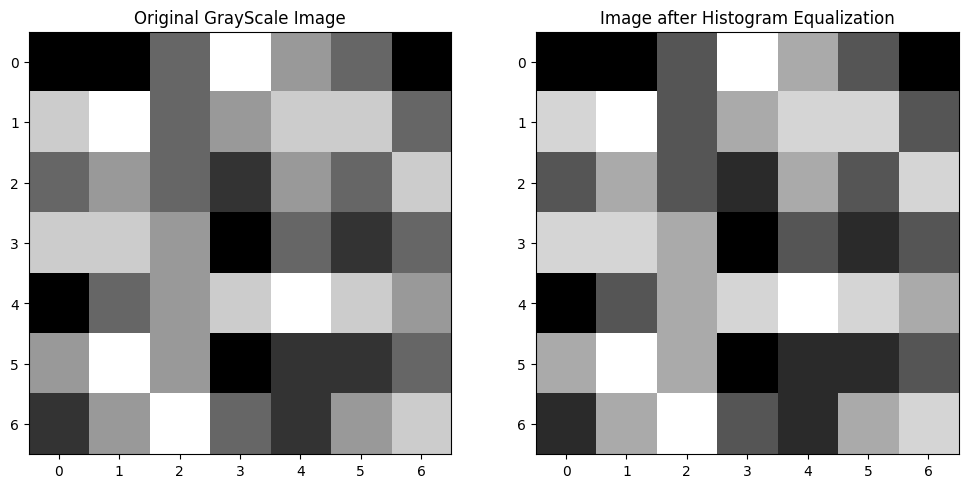

In [25]:
matplot_images(imgg2, equalized, titles=["Original GrayScale Image", "Image after Histogram Equalization"])

#### Histogram Plot for the output Image - 2

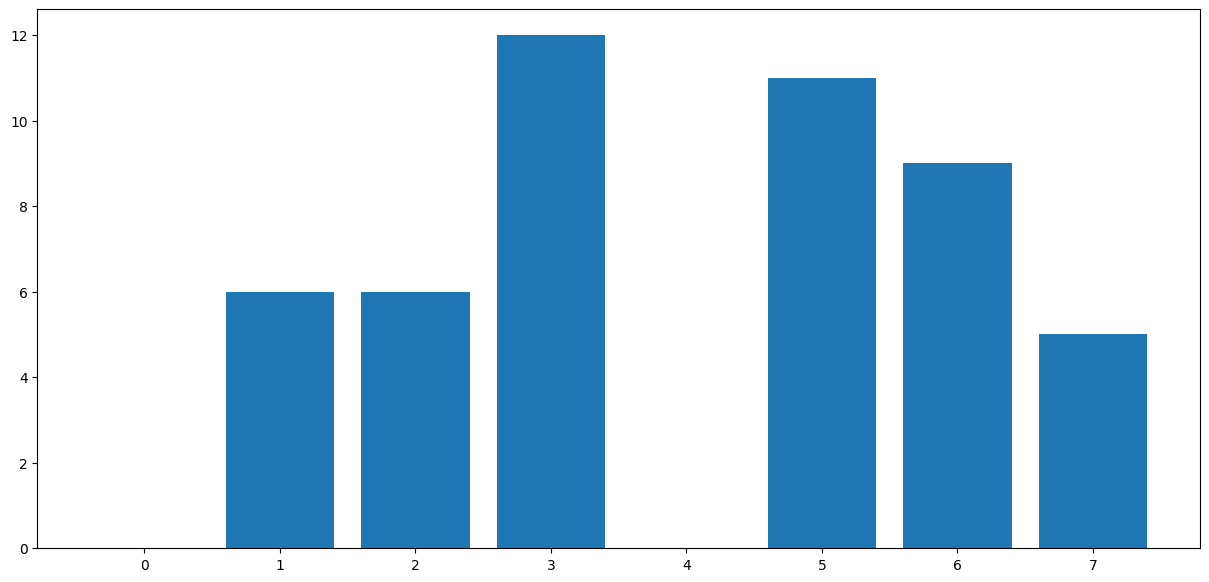

In [26]:
freq = return_frequency(equalized, 8)
plt.figure(figsize=(15, 7))
plt.bar(list(freq.keys()), list(freq.values()))
plt.show()

#### Conclusion 

- The histogram of the original image pixel values was skewed towards the darker values. The new image generated after histogram equalization has the pixel histogram more balanced than the previous with lesser frequencies to darker gray values and significantly more frequency to lighter ones.